In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount= True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import random
import os
import numpy as np

In [ ]:
train_path = "/content/drive/MyDrive/card_train.csv"
test_path = "/content/drive/MyDrive/card_test.csv"

In [ ]:
train_df = pd.read_csv(train_path, encoding = 'utf-8-sig')
y_train = train_df['Segment']
train_df

,Unnamed: 0.1,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,...,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,ID,Segment.1
0,61865,1,자동이체,주거지,우편,우편,1,1,1,466,...,0,5,5,0,0,0,1회 이상,1일 이상,TRAIN_000389,E
1,8547,13,자동이체,미확인,이메일,이메일,1,1,1,2417,...,0,4,6,0,0,0,1회 이상,1일 이상,TRAIN_304152,D
2,43497,25,자동이체,주거지,우편,우편,0,0,0,0,...,2,4,2,0,0,0,5회 이상,5일 이상,TRAIN_356239,E
3,40785,25,자동이체,주거지,우편,우편,1,1,1,5931,...,0,0,0,0,0,0,1회 이상,1일 이상,TRAIN_122432,E
4,18999,25,자동이체,주거지,우편,우편,1,1,1,684,...,2,0,0,0,0,0,10회 이상,10일 이상,TRAIN_285200,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,40610,20,자동이체,회사,우편,우편,1,1,1,958,...,0,0,4,0,0,0,5회 이상,5일 이상,TRAIN_194015,E
70556,2629,27,자동이체,주거지,우편,우편,1,1,1,19187,...,0,1,0,0,0,3,1회 이상,1일 이상,TRAIN_286464,C
70557,65345,12,자동이체,주거지,우편,우편,1,1,1,4788,...,2,0,0,0,0,0,20회 이상,20일 이상,TRAIN_069189,E
70558,69023,23,자동이체,미확인,이메일,이메일,1,1,1,17,...,0,2,0,0,0,0,10회 이상,10일 이상,TRAIN_170116,E


In [ ]:
for i in train_df.columns:
    print(i)

Unnamed: 0.1
대표결제일
대표결제방법코드
대표청구지고객주소구분코드
대표청구서수령지구분코드
청구서수령방법
청구서발송여부_B0
청구서발송여부_R3M
청구서발송여부_R6M
청구금액_B0
청구금액_R3M
청구금액_R6M
포인트_마일리지_건별_B0M
포인트_마일리지_건별_R3M
포인트_포인트_건별_B0M
포인트_포인트_건별_R3M
포인트_마일리지_월적립_B0M
포인트_마일리지_월적립_R3M
포인트_포인트_월적립_B0M
포인트_포인트_월적립_R3M
포인트_적립포인트_R12M
포인트_적립포인트_R3M
포인트_이용포인트_R12M
포인트_이용포인트_R3M
포인트_잔여포인트_B0M
마일_적립포인트_R12M
마일_적립포인트_R3M
마일_이용포인트_R12M
마일_이용포인트_R3M
마일_잔여포인트_B0M
할인건수_R3M
할인금액_R3M
할인건수_B0M
할인금액_B0M
할인금액_청구서_R3M
할인금액_청구서_B0M
상환개월수_결제일_R6M
상환개월수_결제일_R3M
선결제건수_R6M
선결제건수_R3M
연체건수_R6M
연체건수_R3M
혜택수혜금액_R3M
포인트_마일리지_환산_B0M
혜택수혜금액
최초한도금액
카드이용한도금액
CA한도금액
일시상환론한도금액
월상환론한도금액
CA이자율_할인전
CL이자율_할인전
RV일시불이자율_할인전
RV현금서비스이자율_할인전
RV신청일자
RV약정청구율
RV최소결제비율
자발한도감액횟수_R12M
자발한도감액금액_R12M
자발한도감액후경과월
강제한도감액횟수_R12M
강제한도감액금액_R12M
강제한도감액후경과월
한도증액횟수_R12M
한도증액금액_R12M
한도증액후경과월
상향가능한도금액
상향가능CA한도금액
카드론동의여부
월상환론상향가능한도금액
RV전환가능여부
일시불ONLY전환가능여부
카드이용한도금액_B1M
카드이용한도금액_B2M
특별한도보유여부_R3M
연체감액여부_R3M
한도심사요청건수
한도요청거절건수
한도심사요청후경과월
한도심사거절후경과월
시장단기연체여부_R6M
rv최초시작후경과일
증감율_이용건수_신용_전월
증감율_이용건수_신판_전월
증감율_이용건수_일시불_전

In [ ]:
recommended_columns = [
    # 예시 처
    "남녀구분코드", "연령", "Life_Stage","회원여부_연체",
    "이용금액_할부_R12M","입회경과개월수_신용","월상환론한도금액","카드이용한도금액","증감율_이용금액_체크_전월","이용금액_일시불_R12M",
    "포인트_이용포인트_R12M","이용건수_체크_R12M","이용건수_신용_R12M","유효카드수_신용체크","이용금액_체크_R12M",
    "불만제기후경과월_R12M","RP후경과월","_1순위카드이용금액","포인트_적립포인트_R12M",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종","_1순위카드이용건수","월중평잔",
     "_2순위업종_이용금액", "_2순위업종","_2순위카드이용금액","_2순위교통업종","_2순위쇼핑업종",
    "증감율_이용건수_신용_분기","CA한도금액","변동률_일시불평잔","강제한도감액금액_R12M","일시상환론한도금액",
    "변동률_할부평잔","상향가능한도금액","카드론이용건수_누적","이용건수_할부_R12M","정상청구원금_B5M","이용개월수_체크_R12M",
    "연체입금원금_B5M","정상입금원금_B5M","이용개월수_할부_R12M","최초카드론이용경과월",
    "연체일수_최근",
    "최종이용일자_기본",
    "컨택건수_이용유도_TM_R6M",
    "증감율_이용건수_체크_전월",
    "마케팅동의여부",
    "연체원금_최근",
    "이용금액_체크_B0M",
    "최종카드발급경과월",
    "수신거부여부_SMS",
    "RP건수_렌탈_B0M",
]

In [ ]:
X = train_df[recommended_columns]
X

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,2,60대,노년생활,0,0,39,180503,100009,0.000000,8166,...,-999999,20180714,1,0.000000,0,0,0,6,1,0
1,1,30대,가족구축기,0,0,39,0,41180,0.000000,41278,...,-999999,20181130,0,0.000000,1,0,0,49,1,0
2,2,50대,자녀성장(2),0,0,172,206098,40798,0.000000,2979,...,-999999,20180110,5,0.000000,1,0,0,26,1,0
3,2,60대,노년생활,0,24373,202,206308,29999,0.000000,37780,...,-999999,20180911,1,0.000000,1,0,0,22,0,0
4,2,30대,자녀성장(1),0,15966,3,93789,18989,0.002695,2248,...,-999999,20180921,2,-0.210627,1,0,3180,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,1,40대,자녀성장(1),0,3982,11,151553,30003,0.000000,22659,...,-999999,20171127,0,0.000000,1,0,0,17,0,0
70556,1,50대,자녀성장(2),0,0,278,0,52017,0.000000,25655,...,-999999,20180723,0,0.000000,0,0,0,52,1,0
70557,2,60대,자녀독립기,0,28782,191,205060,41444,0.000000,27394,...,-999999,20180721,0,0.000000,1,0,0,13,0,0
70558,2,50대,자녀독립기,0,0,105,160705,50371,0.000000,952,...,-999999,20180709,0,0.000000,1,0,0,13,0,0


In [ ]:
null_columns = [col for col in X.columns if X[col].isna().sum() > 0]
len(null_columns), null_columns

(6, ['_1순위업종', '_1순위쇼핑업종', '_1순위교통업종', '_2순위업종', '_2순위교통업종', '_2순위쇼핑업종'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  object 
 2   Life_Stage        70560 non-null  object 
 3   회원여부_연체           70560 non-null  int64  
 4   이용금액_할부_R12M      70560 non-null  int64  
 5   입회경과개월수_신용        70560 non-null  int64  
 6   월상환론한도금액          70560 non-null  int64  
 7   카드이용한도금액          70560 non-null  int64  
 8   증감율_이용금액_체크_전월    70560 non-null  float64
 9   이용금액_일시불_R12M     70560 non-null  int64  
 10  포인트_이용포인트_R12M    70560 non-null  int64  
 11  이용건수_체크_R12M      70560 non-null  int64  
 12  이용건수_신용_R12M      70560 non-null  int64  
 13  유효카드수_신용체크        70560 non-null  int64  
 14  이용금액_체크_R12M      70560 non-null  int64  
 15  불만제기후경과월_R12M     70560 non-null  int64  
 16  RP후경과월            70560 non-null  int64 

In [ ]:
oj_columns = [x for x in X.columns if X[x].dtype == "object"]
oj_columns


['연령',
 'Life_Stage',
 '_1순위업종',
 '_1순위쇼핑업종',
 '_1순위교통업종',
 '_2순위업종',
 '_2순위교통업종',
 '_2순위쇼핑업종']

In [ ]:
for oj in oj_columns:
  print(oj, X[oj].unique())

연령 ['60대' '30대' '50대' '40대' '20대' '70대이상']
Life_Stage ['노년생활' '가족구축기' '자녀성장(2)' '자녀성장(1)' '독신' '자녀출산기' '자녀독립기']
_1순위업종 ['쇼핑' '교통' nan '납부' '교육' '사교활동' '의료' '해외' '여유생활' '일상생활']
_1순위쇼핑업종 ['마트' '온라인' nan '도소매' '슈퍼마켓' '쇼핑기타' '백화점' '편의점' '아울렛']
_1순위교통업종 [nan '주유' '버스지하철' '철도버스' '정비' '택시']
_2순위업종 [nan '쇼핑' '납부' '사교활동' '의료' '교통' '해외' '교육' '일상생활' '여유생활' '요식']
_2순위교통업종 [nan '버스지하철' '철도버스' '정비' '택시' '주유']
_2순위쇼핑업종 ['도소매' '슈퍼마켓' nan '편의점' '마트' '백화점' '온라인' '쇼핑기타' '아울렛']


## 전처리

In [ ]:
from sklearn.preprocessing import LabelEncoder

def preprocessing(df):
    oj_columns = [x for x in df.columns if df[x].dtype == "object"]
    for cate in oj_columns:
        df[cate] = df[cate].fillna("missing")  # NaN 처리 먼저
        le = LabelEncoder()
        df[cate] = le.fit_transform(df[cate])

    return df

In [ ]:
x_train = preprocessing(X)
x_train

<ipython-input-10-bc8f728160d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = df[cate].fillna("missing")  # NaN 처리 먼저
<ipython-input-10-bc8f728160d2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = le.fit_transform(df[cate])
<ipython-input-10-bc8f728160d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,2,4,1,0,0,39,180503,100009,0.000000,8166,...,-999999,20180714,1,0.000000,0,0,0,6,1,0
1,1,1,0,0,0,39,0,41180,0.000000,41278,...,-999999,20181130,0,0.000000,1,0,0,49,1,0
2,2,3,5,0,0,172,206098,40798,0.000000,2979,...,-999999,20180110,5,0.000000,1,0,0,26,1,0
3,2,4,1,0,24373,202,206308,29999,0.000000,37780,...,-999999,20180911,1,0.000000,1,0,0,22,0,0
4,2,1,4,0,15966,3,93789,18989,0.002695,2248,...,-999999,20180921,2,-0.210627,1,0,3180,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,1,2,4,0,3982,11,151553,30003,0.000000,22659,...,-999999,20171127,0,0.000000,1,0,0,17,0,0
70556,1,3,5,0,0,278,0,52017,0.000000,25655,...,-999999,20180723,0,0.000000,0,0,0,52,1,0
70557,2,4,3,0,28782,191,205060,41444,0.000000,27394,...,-999999,20180721,0,0.000000,1,0,0,13,0,0
70558,2,3,3,0,0,105,160705,50371,0.000000,952,...,-999999,20180709,0,0.000000,1,0,0,13,0,0


In [ ]:
#연령만 프리퀀시 인코더 적용
#컬럼 하나만 바꾸기 때문에 encoder을 쓸 필요는 없음
freq_map = X["연령"].value_counts().to_dict()
X["연령"] = X["연령"].map(freq_map)

<ipython-input-12-33ec5a0f327b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["연령"] = X["연령"].map(freq_map)


In [ ]:
#['연령']을 프리퀀시 인코딩 하니 미세하게 모델 성능이 향상됨. 따라서 dtpye이 object인 컬럼들을 브리퀀시 인코딩 해봄.
#모델이 “업종”의 의미보단 “몇 명이 이 업종을 쓰는지”에 집중
#희귀 업종의 영향력을 자동으로 줄여줌
freq_cols = [
    "Life_Stage",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종",
    "_2순위업종", "_2순위교통업종", "_2순위쇼핑업종"
]

# 각 컬럼에 대해 Frequency Encoding 적용
for col in freq_cols:
    freq_map = X[col].value_counts().to_dict()
    X[col] = X[col].map(freq_map)

<ipython-input-13-f2bcd3994a97>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map(freq_map)


In [ ]:
X[[
    "Life_Stage",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종",
    "_2순위업종", "_2순위교통업종", "_2순위쇼핑업종"
]]

,Life_Stage,_1순위업종,_1순위쇼핑업종,_1순위교통업종,_2순위업종,_2순위교통업종,_2순위쇼핑업종
0,6881,30154,6420,34379,27072,48906,11008
1,7051,5607,19405,20865,9199,5126,8358
2,17567,15937,27245,34379,27072,48906,33547
3,6881,30154,6420,20865,7805,48906,33547
4,23213,12162,27245,34379,27072,48906,33547
...,...,...,...,...,...,...,...
70555,23213,12162,6420,2426,14523,48906,3163
70556,17567,5607,12182,20865,9199,48906,33547
70557,5762,30154,12182,7937,2007,48906,8358
70558,5762,12162,27245,34379,27072,48906,33547


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  int64  
 2   Life_Stage        70560 non-null  int64  
 3   회원여부_연체           70560 non-null  int64  
 4   이용금액_할부_R12M      70560 non-null  int64  
 5   입회경과개월수_신용        70560 non-null  int64  
 6   월상환론한도금액          70560 non-null  int64  
 7   카드이용한도금액          70560 non-null  int64  
 8   증감율_이용금액_체크_전월    70560 non-null  float64
 9   이용금액_일시불_R12M     70560 non-null  int64  
 10  포인트_이용포인트_R12M    70560 non-null  int64  
 11  이용건수_체크_R12M      70560 non-null  int64  
 12  이용건수_신용_R12M      70560 non-null  int64  
 13  유효카드수_신용체크        70560 non-null  int64  
 14  이용금액_체크_R12M      70560 non-null  int64  
 15  불만제기후경과월_R12M     70560 non-null  int64  
 16  RP후경과월            70560 non-null  int64 

In [ ]:
#정상적인 고객의 차이일 뿐이라 정상적인 다양성이기 때문에 이상치 처리 불필요

#for col in X.select_dtypes(include=["int64", "float64"]).columns:
#    q1 = X[col].quantile(0.25)
#    q3 = X[col].quantile(0.75)
#    iqr = q3 - q1
#    upper_fence = q3 + 1.5 * iqr

    # 이상치 여부 확인
#    if X[col].max() > upper_fence:
#        print(f"{col} → 이상치 있음 (max: {X[col].max()} > upper: {upper_fence})")

In [ ]:
#파생변수 생성
# 안전한 나눗셈을 위한 +1 추가는 0 나누기 방지용
X["신용카드_이용률"] = X["이용금액_일시불_R12M"] / (X["카드이용한도금액"] + 1)
X["체크카드_이용률"] = X["이용금액_체크_R12M"] / (X["월중평잔"] + 1)
X["포인트_사용률"] = X["포인트_이용포인트_R12M"] / (X["포인트_적립포인트_R12M"] + 1)
X["평균_건당_결제금액"] = X["이용금액_일시불_R12M"] / (X["이용건수_신용_R12M"] + 1)
X["연체비율"] = X["연체원금_최근"] / (X["정상입금원금_B5M"] + 1)
X["상향가능_비율"] = X["상향가능한도금액"] / (X["카드이용한도금액"] + 1)
X["카드론_활용도"] = X["카드론이용건수_누적"] / (X["이용개월수_할부_R12M"] + 1)
X["불만_경과율"] = X["불만제기후경과월_R12M"] / 12
X

<ipython-input-17-ad18e2c95aed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["신용카드_이용률"] = X["이용금액_일시불_R12M"] / (X["카드이용한도금액"] + 1)
<ipython-input-17-ad18e2c95aed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["체크카드_이용률"] = X["이용금액_체크_R12M"] / (X["월중평잔"] + 1)
<ipython-input-17-ad18e2c95aed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,수신거부여부_SMS,RP건수_렌탈_B0M,신용카드_이용률,체크카드_이용률,포인트_사용률,평균_건당_결제금액,연체비율,상향가능_비율,카드론_활용도,불만_경과율
0,2,7354,6881,0,0,39,180503,100009,0.000000,8166,...,1,0,0.081652,-1.322684,0.000000,77.771429,0.0,0.000000,0.000000,0.0
1,1,17410,7051,0,0,39,0,41180,0.000000,41278,...,1,0,1.002355,0.479321,0.000000,115.949438,0.0,0.000146,0.000000,0.0
2,2,16113,17567,0,0,172,206098,40798,0.000000,2979,...,1,0,0.073016,2793.000000,0.000000,inf,0.0,0.000147,0.000000,1.0
3,2,7354,6881,0,24373,202,206308,29999,0.000000,37780,...,0,0,1.259333,-0.040877,0.966677,264.195804,0.0,0.000167,0.000000,1.0
4,2,17410,23213,0,15966,3,93789,18989,0.002695,2248,...,0,0,0.118378,41.140845,0.000000,inf,0.0,0.000211,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,1,21487,23213,0,3982,11,151553,30003,0.000000,22659,...,0,0,0.755199,-0.322933,0.000000,5664.750000,0.0,0.000167,0.000000,0.0
70556,1,16113,17567,0,0,278,0,52017,0.000000,25655,...,1,0,0.493195,-0.026034,0.000000,388.712121,0.0,0.000000,2.000000,0.0
70557,2,7354,5762,0,28782,191,205060,41444,0.000000,27394,...,0,0,0.660972,-0.025646,0.000000,108.276680,0.0,0.000121,0.111111,1.0
70558,2,16113,5762,0,0,105,160705,50371,0.000000,952,...,0,0,0.018899,68.411765,1.030979,119.000000,0.0,0.000179,0.000000,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 62 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  int64  
 2   Life_Stage        70560 non-null  int64  
 3   회원여부_연체           70560 non-null  int64  
 4   이용금액_할부_R12M      70560 non-null  int64  
 5   입회경과개월수_신용        70560 non-null  int64  
 6   월상환론한도금액          70560 non-null  int64  
 7   카드이용한도금액          70560 non-null  int64  
 8   증감율_이용금액_체크_전월    70560 non-null  float64
 9   이용금액_일시불_R12M     70560 non-null  int64  
 10  포인트_이용포인트_R12M    70560 non-null  int64  
 11  이용건수_체크_R12M      70560 non-null  int64  
 12  이용건수_신용_R12M      70560 non-null  int64  
 13  유효카드수_신용체크        70560 non-null  int64  
 14  이용금액_체크_R12M      70560 non-null  int64  
 15  불만제기후경과월_R12M     70560 non-null  int64  
 16  RP후경과월            70560 non-null  int64 

In [ ]:
x_test = pd.read_csv(test_path, encoding='utf-8-sig')
x_test = x_test[recommended_columns]
x_test = preprocessing(x_test)

freq_map = x_test["연령"].value_counts().to_dict()
x_test["연령"] = x_test["연령"].map(freq_map)

for col in freq_cols:
    freq_map = x_test[col].value_counts().to_dict()
    x_test[col] = x_test[col].map(freq_map)

x_test["신용카드_이용률"] = x_test["이용금액_일시불_R12M"] / (x_test["카드이용한도금액"] + 1)
x_test["체크카드_이용률"] = x_test["이용금액_체크_R12M"] / (x_test["월중평잔"] + 1)
x_test["포인트_사용률"] = x_test["포인트_이용포인트_R12M"] / (x_test["포인트_적립포인트_R12M"] + 1)
x_test["평균_건당_결제금액"] = x_test["이용금액_일시불_R12M"] / (x_test["이용건수_신용_R12M"] + 1)
x_test["연체비율"] = x_test["연체원금_최근"] / (x_test["정상입금원금_B5M"] + 1)
x_test["상향가능_비율"] = x_test["상향가능한도금액"] / (x_test["카드이용한도금액"] + 1)
x_test["카드론_활용도"] = x_test["카드론이용건수_누적"] / (x_test["이용개월수_할부_R12M"] + 1)
x_test["불만_경과율"] = x_test["불만제기후경과월_R12M"] / 12


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 62 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            1440 non-null   int64  
 1   연령                1440 non-null   int64  
 2   Life_Stage        1440 non-null   int64  
 3   회원여부_연체           1440 non-null   int64  
 4   이용금액_할부_R12M      1440 non-null   int64  
 5   입회경과개월수_신용        1440 non-null   int64  
 6   월상환론한도금액          1440 non-null   int64  
 7   카드이용한도금액          1440 non-null   int64  
 8   증감율_이용금액_체크_전월    1440 non-null   float64
 9   이용금액_일시불_R12M     1440 non-null   int64  
 10  포인트_이용포인트_R12M    1440 non-null   int64  
 11  이용건수_체크_R12M      1440 non-null   int64  
 12  이용건수_신용_R12M      1440 non-null   int64  
 13  유효카드수_신용체크        1440 non-null   int64  
 14  이용금액_체크_R12M      1440 non-null   int64  
 15  불만제기후경과월_R12M     1440 non-null   int64  
 16  RP후경과월            1440 non-null   int64  


In [ ]:
!apt-get -qq install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설정
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = fontprop.get_name()
plt.rcParams["axes.unicode_minus"] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory det

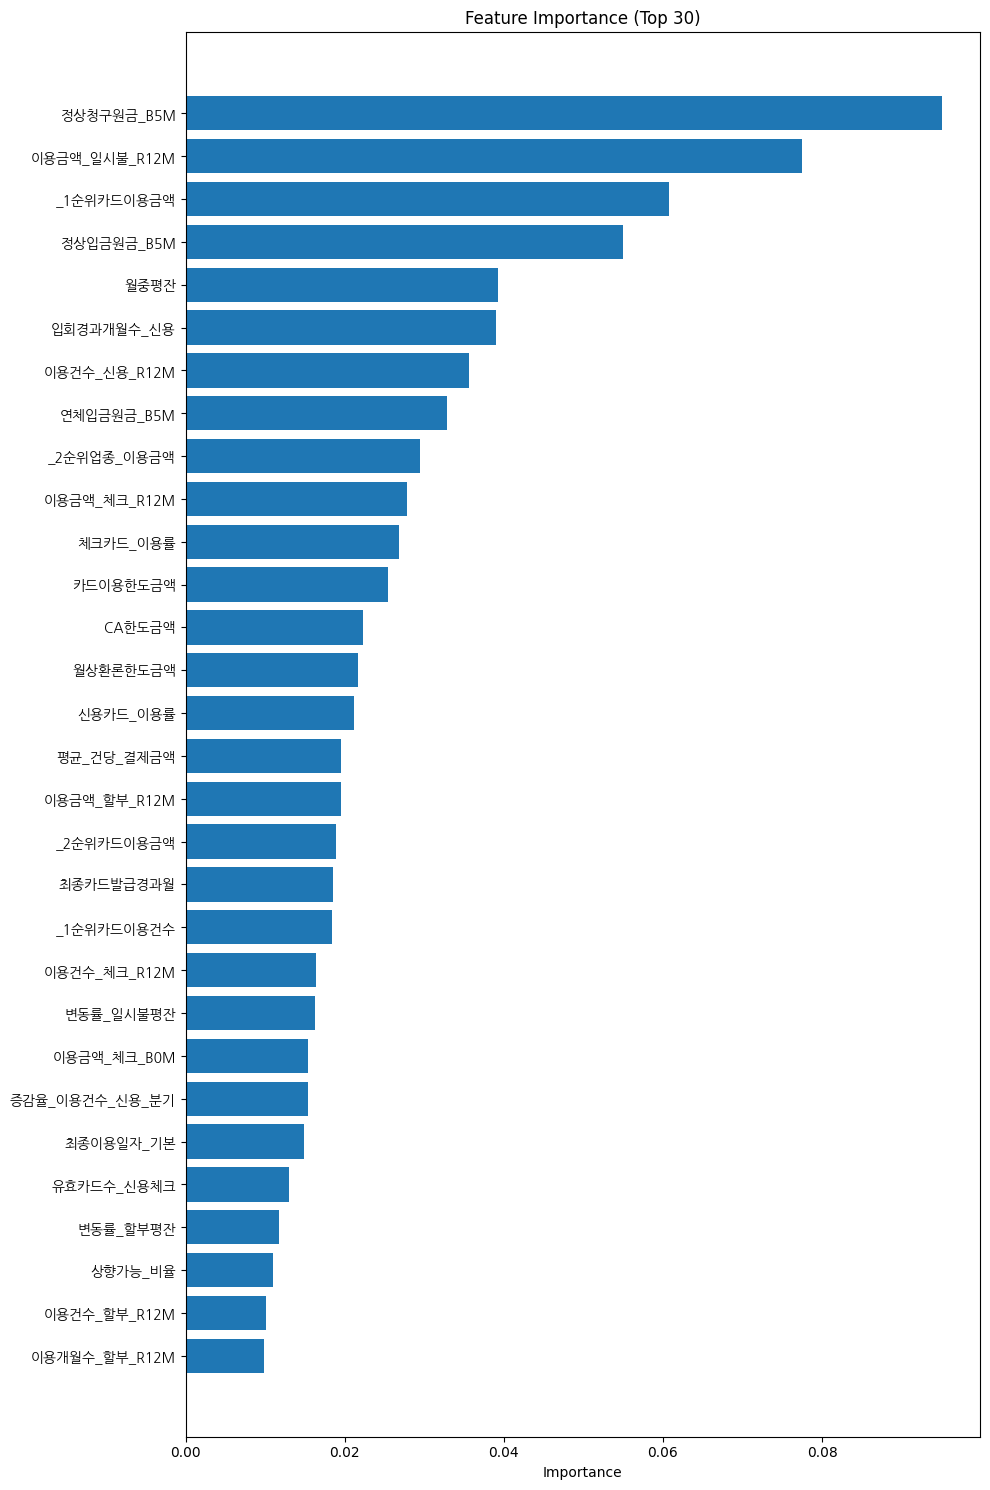

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np

# 1. 수치형 피처만 선택
X_numeric = X.select_dtypes(include=["int64", "float64"])
y = train_df["Segment"]

# 추가: inf, -inf 값 NaN으로 변환 (이게 누락돼서 오류 발생했던 것)
X_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)

# 2. 결측치 평균 대체
imputer = SimpleImputer(strategy="mean")
X_numeric_clean = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)

# 3. 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_numeric_clean, y)

# 4. 중요도 추출
importance = pd.Series(model.feature_importances_, index=X_numeric.columns)
top30 = importance.sort_values(ascending=True).tail(30)

# 5. 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

# 6. 시각화
plt.figure(figsize=(10, 15))
plt.barh(top30.index, top30.values)
plt.title("Feature Importance (Top 30)")
plt.xlabel("Importance")
plt.yticks(fontproperties=font_prop)
plt.tight_layout()
plt.show()


In [ ]:
y_train

,Segment
0,E
1,D
2,E
3,E
4,E
...,...
70555,E
70556,C
70557,E
70558,E


In [ ]:
# Drift feature 중요도 계산
from lightgbm import LGBMClassifier as LGBMDrift

# 원본 데이터 보존
X_drift = X.copy()
x_test_drift = x_test.copy()

X_drift['is_train'] = 1
x_test_drift['is_train'] = 0

all_drift = pd.concat([X_drift, x_test_drift])
y_drift = all_drift['is_train']
X_drift_final = all_drift.drop(columns='is_train')

drift_model = LGBMDrift(random_state=42)
drift_model.fit(X_drift_final, y_drift)

drift_importance = pd.Series(drift_model.feature_importances_, index=X_drift_final.columns).sort_values(ascending=False)
print("[Drift Score Top 20]")
print(drift_importance.head(20))

# 원본은 건드리지 않고, 별도 버전 생성
drift_cols_to_drop = drift_importance.head(10).index.tolist()
X_drift_filtered = X.drop(columns=drift_cols_to_drop)
x_test_drift_filtered = x_test.drop(columns=drift_cols_to_drop)


[LightGBM] [Info] Number of positive: 70560, number of negative: 1440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8957
[LightGBM] [Info] Number of data points in the train set: 72000, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.980000 -> initscore=3.891820
[LightGBM] [Info] Start training from score 3.891820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
# 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_numeric_clean, y)


RandomForestClassifier(random_state=42)

###모델 학습 및 앙상블 예측

In [ ]:
!pip install xgboost lightgbm catboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [ ]:
X = x_train
y = y_train

In [ ]:
y

,Segment
0,E
1,D
2,E
3,E
4,E
...,...
70555,E
70556,C
70557,E
70558,E


In [ ]:
print(y.value_counts())

Segment
E    56505
D    10270
C     3753
A       28
B        4
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

In [ ]:
#불균형 확인

y = pd.Series(y)

print(y.value_counts())
print(y.value_counts(normalize=True))

4    56505
3    10270
2     3753
0       28
1        4
Name: count, dtype: int64
4    0.800808
3    0.145550
2    0.053189
0    0.000397
1    0.000057
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


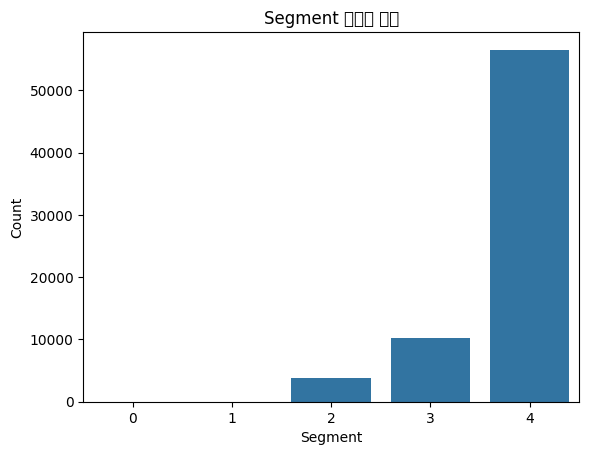

In [ ]:
sns.countplot(x=y)
plt.title("Segment 클래스 분포")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

In [ ]:
print(y.value_counts())

4    56505
3    10270
2     3753
0       28
1        4
Name: count, dtype: int64


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 62 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  int64  
 2   Life_Stage        70560 non-null  int64  
 3   회원여부_연체           70560 non-null  int64  
 4   이용금액_할부_R12M      70560 non-null  int64  
 5   입회경과개월수_신용        70560 non-null  int64  
 6   월상환론한도금액          70560 non-null  int64  
 7   카드이용한도금액          70560 non-null  int64  
 8   증감율_이용금액_체크_전월    70560 non-null  float64
 9   이용금액_일시불_R12M     70560 non-null  int64  
 10  포인트_이용포인트_R12M    70560 non-null  int64  
 11  이용건수_체크_R12M      70560 non-null  int64  
 12  이용건수_신용_R12M      70560 non-null  int64  
 13  유효카드수_신용체크        70560 non-null  int64  
 14  이용금액_체크_R12M      70560 non-null  int64  
 15  불만제기후경과월_R12M     70560 non-null  int64  
 16  RP후경과월            70560 non-null  int64 

## 0, 1 클래스 표본 수 너무 적어서 삭제

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import numpy as np

# 1. 클래스 0, 1 제거
valid_classes = [2, 3, 4]
filtered_idx = y.isin(valid_classes)
X = X[filtered_idx]
y = y[filtered_idx]

# 무한값 → NaN → 평균 대체
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# 2. SMOTE만 적용 (클래스 2, 3만 증강)
smote = SMOTE(
    sampling_strategy={2: 40000, 3: 45000},  # 원하는 수치로 증강
    random_state=42
)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 결과 확인
print("클래스 분포:")
print(pd.Series(y_resampled).value_counts())

클래스 분포:
4    56505
3    45000
2    40000
Name: count, dtype: int64


<ipython-input-34-66b2b0831aa0>:5: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-66b2b0831aa0>:5: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-66b2b0831aa0>:5: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-66b2b0831aa0>:5: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-66b2b0831aa0>:5: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-66b2b0831aa0>:5: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-66b2b0831aa0>:5: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/p

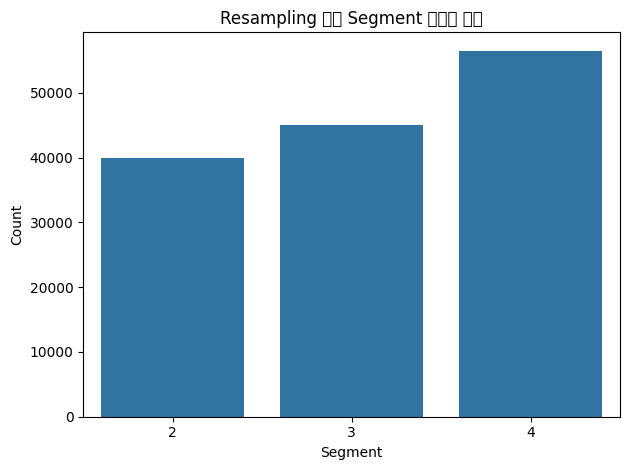

In [ ]:
sns.countplot(x=y_resampled)
plt.title("Resampling 이후 Segment 클래스 분포")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
X.shape

(70528, 62)

In [ ]:
y.shape

(70528,)

In [ ]:
missing_columns = X.columns[X.isnull().any()].tolist()
print("결측치가 있는 컬럼 수:", len(missing_columns))
print("결측치 포함 컬럼 목록:")
print(missing_columns)


결측치가 있는 컬럼 수: 0
결측치 포함 컬럼 목록:
[]


### 하이퍼 파라미터 튜닝 및 앙상블

In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import make_scorer, f1_score, classification_report
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# import numpy as np

# # 1. 데이터 분할
# X_train, X_val, y_train, y_val = train_test_split(
#     X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
# )

# # 2. F1 scorer 정의
# f1_macro = make_scorer(f1_score, average='macro')

# # 3. XGBoost 튜닝
# param_xgb = {
#     'n_estimators': [100, 300],
#     'max_depth': [3, 5],
#     'learning_rate': [0.05, 0.1]
# }
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# grid_xgb = GridSearchCV(xgb, param_xgb, scoring=f1_macro, cv=3, n_jobs=-1)
# grid_xgb.fit(X_train, y_train)
# best_xgb = grid_xgb.best_estimator_

# # 4. LightGBM 튜닝
# param_lgb = {
#     'n_estimators': [100, 300],
#     'max_depth': [3, 5],
#     'learning_rate': [0.05, 0.1]
# }
# lgb = LGBMClassifier(random_state=42)
# grid_lgb = GridSearchCV(lgb, param_lgb, scoring=f1_macro, cv=3, n_jobs=-1)
# grid_lgb.fit(X_train, y_train)
# best_lgb = grid_lgb.best_estimator_

# # 5. CatBoost 기본 (튜닝은 선택)
# cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
# cat.fit(X_train, y_train)

# # 6. soft voting 예측
# xgb_proba = best_xgb.predict_proba(X_val)
# lgb_proba = best_lgb.predict_proba(X_val)
# cat_proba = cat.predict_proba(X_val)

# ensemble_proba = (xgb_proba + lgb_proba + cat_proba) / 3
# ensemble_pred = np.argmax(ensemble_proba, axis=1)  # 가장 큰 값 반환

# # 7. 평가
# print("F1 Score (macro):", f1_score(y_val, ensemble_pred, average='macro'))
# print("F1 Score (weighted):", f1_score(y_val, ensemble_pred, average='weighted'))
# print("\n Classification Report:")
# print(classification_report(y_val, ensemble_pred))


### 최적의 파라미터 적용한 코드!!!!!!!!!!!!!!!


In [ ]:
# 기존 전체 feature로 soft voting 평가 (기준 성능 유지용)
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np

# 1. 데이터 분할 (전체 feature 기준)
X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)
le = LabelEncoder()
y_train_all_enc = le.fit_transform(y_train_all)  # [2, 3, 4] → [0, 1, 2]
y_val_all_enc = le.transform(y_val_all)

# 2. 모델 정의 및 학습
xgb = XGBClassifier(n_estimators=300, max_depth=5, use_label_encoder=False,
                    eval_metric='mlogloss', learning_rate=0.1, random_state=42)
lgb = LGBMClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, random_state=42)
cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)

xgb.fit(X_train_all, y_train_all_enc)
lgb.fit(X_train_all, y_train_all_enc)
cat.fit(X_train_all, y_train_all_enc)

# 3. soft voting 예측 (가중치 적용)
xgb_proba_all = xgb.predict_proba(X_val_all)
lgb_proba_all = lgb.predict_proba(X_val_all)
cat_proba_all = cat.predict_proba(X_val_all)

ensemble_proba_all = (
    0.3 * xgb_proba_all +
    0.5 * lgb_proba_all +
    0.2 * cat_proba_all
)

ensemble_pred_all = np.argmax(ensemble_proba_all, axis=1)  # [0, 1, 2]
ensemble_pred_final = le.inverse_transform(ensemble_pred_all)  # [0, 1, 2] → [2, 3, 4]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:44:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11438
[LightGBM] [Info] Number of data points in the train set: 113204, number of used features: 62
[LightGBM] [Info] Start training from score -1.263456
[LightGBM] [Info] Start training from score -1.145673
[LightGBM] [Info] Start training from score -0.918006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [ ]:
# 4. ALL Features 평가
print("[Soft Voting - All Features] F1 Score (macro):", f1_score(y_val_all, ensemble_pred_final, average='macro'))
print("[Soft Voting - All Features] F1 Score (weighted):", f1_score(y_val_all, ensemble_pred_final, average='weighted'))
print("\n[Soft Voting - All Features] Classification Report:")
print(classification_report(y_val_all, ensemble_pred_final))


[Soft Voting - All Features] F1 Score (macro): 0.8993653603960258
[Soft Voting - All Features] F1 Score (weighted): 0.9032368145399028

[Soft Voting - All Features] Classification Report:
              precision    recall  f1-score   support

           2       0.89      0.90      0.90      8000
           3       0.87      0.84      0.85      9000
           4       0.94      0.96      0.95     11301

    accuracy                           0.90     28301
   macro avg       0.90      0.90      0.90     28301
weighted avg       0.90      0.90      0.90     28301



In [ ]:

# 추가 실험: Feature Importance 기반 Top-K Feature Selection
from sklearn.ensemble import RandomForestClassifier

# 5. 중요도 기반 Top-K 추출
X_numeric = X_resampled.select_dtypes(include=['int64', 'float64'])
y = y_resampled

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_numeric, y)

feature_importance = pd.Series(rf_model.feature_importances_, index=X_numeric.columns)
top_k = 80
top_features = feature_importance.sort_values(ascending=False).head(top_k).index.tolist()
X_topk = X_resampled[top_features]

# 6. 분할 및 재학습 (Top-K 기준)
X_train_topk, X_val_topk, y_train_topk, y_val_topk = train_test_split(
    X_topk, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

xgb.fit(X_train_topk, y_train_topk)
lgb.fit(X_train_topk, y_train_topk)
cat.fit(X_train_topk, y_train_topk)

xgb_proba_k = xgb.predict_proba(X_val_topk)
lgb_proba_k = lgb.predict_proba(X_val_topk)
cat_proba_k = cat.predict_proba(X_val_topk)

ensemble_proba_k = (
    0.5 * lgb_proba_k +
    0.3 * xgb_proba_k +
    0.2 * cat_proba_k
)
ensemble_pred_k = np.argmax(ensemble_proba_k, axis=1)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:50:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11444
[LightGBM] [Info] Number of data points in the train set: 165204, number of used features: 62
[LightGBM] [Info] Start training from score -1.774977
[LightGBM] [Info] Start training from score -1.929127
[LightGBM] [Info] Start training from score -1.641445
[LightGBM] [Info] Start training from score -1.523662
[LightGBM] [Info] Start training from score -1.295995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
# 7. Top-K Feature 평가
print("[Top-K Features Voting] F1 Score (macro):", f1_score(y_val_topk, ensemble_pred_k, average='macro'))
print("[Top-K Features Voting] F1 Score (weighted):", f1_score(y_val_topk, ensemble_pred_k, average='weighted'))
print("\n[Top-K Features Voting] Classification Report:")
print(classification_report(y_val_topk, ensemble_pred_k))

[Top-K Features Voting] F1 Score (macro): 0.9413847615294294
[Top-K Features Voting] F1 Score (weighted): 0.9355423896584165

[Top-K Features Voting] Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7000
           1       1.00      1.00      1.00      6000
           2       0.90      0.90      0.90      8000
           3       0.87      0.85      0.86      9000
           4       0.94      0.95      0.95     11301

    accuracy                           0.94     41301
   macro avg       0.94      0.94      0.94     41301
weighted avg       0.94      0.94      0.94     41301



##예측

In [ ]:
x_new = pd.read_csv(test_path)
x_new[recommended_columns]

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,1,40대,자녀성장(1),0,0,32,0,19445,0.000000,111616,...,-999999,20180714,1,0.000000,1,0,0,47,0,0
1,1,70대이상,노년생활,0,0,250,55729,210918,0.000000,39818,...,-999999,20181209,0,0.000000,1,0,0,30,1,0
2,1,50대,자녀성장(2),0,25004,28,0,49267,0.000000,74963,...,-999999,20180927,0,0.000000,1,0,0,6,0,0
3,1,20대,가족구축기,0,0,18,152414,43873,0.000000,14642,...,-999999,20180719,3,0.000000,1,0,0,9,0,0
4,1,60대,노년생활,0,6286,4,0,49656,0.000000,42074,...,-999999,20180719,0,0.000000,1,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1,30대,가족구축기,0,0,87,0,0,0.000000,0,...,0,20161204,4,0.000000,1,0,0,0,0,0
1436,1,30대,가족구축기,0,0,37,0,20329,-0.206064,6183,...,-999999,20181018,0,-0.194718,1,0,12921,35,0,0
1437,2,40대,자녀성장(1),0,2291,67,0,48738,0.000000,64721,...,-999999,20181122,0,0.000000,1,0,0,8,0,0
1438,2,40대,자녀성장(1),0,0,112,157114,30000,0.000000,738,...,-999999,20180803,2,0.000000,1,0,0,49,1,0


In [ ]:
x_new = preprocessing(x_new)
x_new[recommended_columns]

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,1,2,4,0,0,32,0,19445,0.000000,111616,...,-999999,20180714,1,0.000000,1,0,0,47,0,0
1,1,5,1,0,0,250,55729,210918,0.000000,39818,...,-999999,20181209,0,0.000000,1,0,0,30,1,0
2,1,3,5,0,25004,28,0,49267,0.000000,74963,...,-999999,20180927,0,0.000000,1,0,0,6,0,0
3,1,0,0,0,0,18,152414,43873,0.000000,14642,...,-999999,20180719,3,0.000000,1,0,0,9,0,0
4,1,4,1,0,6286,4,0,49656,0.000000,42074,...,-999999,20180719,0,0.000000,1,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1,1,0,0,0,87,0,0,0.000000,0,...,0,20161204,4,0.000000,1,0,0,0,0,0
1436,1,1,0,0,0,37,0,20329,-0.206064,6183,...,-999999,20181018,0,-0.194718,1,0,12921,35,0,0
1437,2,2,4,0,2291,67,0,48738,0.000000,64721,...,-999999,20181122,0,0.000000,1,0,0,8,0,0
1438,2,2,4,0,0,112,157114,30000,0.000000,738,...,-999999,20180803,2,0.000000,1,0,0,49,1,0


In [ ]:
x_new = x_new[recommended_columns]
x_new["신용카드_이용률"] = x_new["이용금액_일시불_R12M"] / (x_new["카드이용한도금액"] + 1)
x_new["체크카드_이용률"] = x_new["이용금액_체크_R12M"] / (x_new["월중평잔"] + 1)
x_new["포인트_사용률"] = x_new["포인트_이용포인트_R12M"] / (x_new["포인트_적립포인트_R12M"] + 1)
x_new["평균_건당_결제금액"] = x_new["이용금액_일시불_R12M"] / (x_new["이용건수_신용_R12M"] + 1)
x_new["연체비율"] = x_new["연체원금_최근"] / (x_new["정상입금원금_B5M"] + 1)
x_new["상향가능_비율"] = x_new["상향가능한도금액"] / (x_new["카드이용한도금액"] + 1)
x_new["카드론_활용도"] = x_new["카드론이용건수_누적"] / (x_new["이용개월수_할부_R12M"] + 1)
x_new["불만_경과율"] = x_new["불만제기후경과월_R12M"] / 12
x_new

<ipython-input-46-b8ec418b9d44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_new["신용카드_이용률"] = x_new["이용금액_일시불_R12M"] / (x_new["카드이용한도금액"] + 1)
<ipython-input-46-b8ec418b9d44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_new["체크카드_이용률"] = x_new["이용금액_체크_R12M"] / (x_new["월중평잔"] + 1)
<ipython-input-46-b8ec418b9d44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,수신거부여부_SMS,RP건수_렌탈_B0M,신용카드_이용률,체크카드_이용률,포인트_사용률,평균_건당_결제금액,연체비율,상향가능_비율,카드론_활용도,불만_경과율
0,1,2,4,0,0,32,0,19445,0.000000,111616,...,0,0,5.739792,0.145144,0.000000,303.304348,0.0,0.000000,2.000000,0.0
1,1,5,1,0,0,250,55729,210918,0.000000,39818,...,1,0,0.188783,0.077585,1.212538,inf,0.0,0.000000,0.000000,1.0
2,1,3,5,0,25004,28,0,49267,0.000000,74963,...,0,0,1.521535,0.518061,0.000000,265.826241,0.0,0.000000,0.857143,1.0
3,1,0,0,0,0,18,152414,43873,0.000000,14642,...,0,0,0.333728,-0.118320,1.326257,180.765432,0.0,0.000114,0.000000,1.0
4,1,4,1,0,6286,4,0,49656,0.000000,42074,...,0,0,0.847292,0.211988,1.650708,396.924528,0.0,0.000141,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1,1,0,0,0,87,0,0,0.000000,0,...,0,0,0.000000,-414.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.0
1436,1,1,0,0,0,37,0,20329,-0.206064,6183,...,0,0,0.304132,82442.000000,1.919953,123.660000,0.0,0.000000,0.000000,1.0
1437,2,2,4,0,2291,67,0,48738,0.000000,64721,...,0,0,1.327910,-0.057708,0.000000,246.087452,0.0,0.000103,0.000000,1.0
1438,2,2,4,0,0,112,157114,30000,0.000000,738,...,1,0,0.024599,-4.500000,0.000000,inf,0.0,0.000133,0.000000,0.0


In [ ]:
freq_map = x_new["연령"].value_counts().to_dict()
x_new["연령"] = x_new["연령"].map(freq_map)


freq_cols = [
    "Life_Stage",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종",
    "_2순위업종", "_2순위교통업종", "_2순위쇼핑업종"
]

# 각 컬럼에 대해 Frequency Encoding 적용
for col in freq_cols:
    freq_map = x_new[col].value_counts().to_dict()
    x_new[col] = x_new[col].map(freq_map)

display(x_new)
display(x_new[[
    "Life_Stage",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종",
    "_2순위업종", "_2순위교통업종", "_2순위쇼핑업종"
]])

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,수신거부여부_SMS,RP건수_렌탈_B0M,신용카드_이용률,체크카드_이용률,포인트_사용률,평균_건당_결제금액,연체비율,상향가능_비율,카드론_활용도,불만_경과율
0,1,444,475,0,0,32,0,19445,0.000000,111616,...,0,0,5.739792,0.145144,0.000000,303.304348,0.0,0.000000,2.000000,0.0
1,1,47,139,0,0,250,55729,210918,0.000000,39818,...,1,0,0.188783,0.077585,1.212538,inf,0.0,0.000000,0.000000,1.0
2,1,335,362,0,25004,28,0,49267,0.000000,74963,...,0,0,1.521535,0.518061,0.000000,265.826241,0.0,0.000000,0.857143,1.0
3,1,113,143,0,0,18,152414,43873,0.000000,14642,...,0,0,0.333728,-0.118320,1.326257,180.765432,0.0,0.000114,0.000000,1.0
4,1,160,139,0,6286,4,0,49656,0.000000,42074,...,0,0,0.847292,0.211988,1.650708,396.924528,0.0,0.000141,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1,341,143,0,0,87,0,0,0.000000,0,...,0,0,0.000000,-414.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.0
1436,1,341,143,0,0,37,0,20329,-0.206064,6183,...,0,0,0.304132,82442.000000,1.919953,123.660000,0.0,0.000000,0.000000,1.0
1437,2,444,475,0,2291,67,0,48738,0.000000,64721,...,0,0,1.327910,-0.057708,0.000000,246.087452,0.0,0.000103,0.000000,1.0
1438,2,444,475,0,0,112,157114,30000,0.000000,738,...,1,0,0.024599,-4.500000,0.000000,inf,0.0,0.000133,0.000000,0.0


,Life_Stage,_1순위업종,_1순위쇼핑업종,_1순위교통업종,_2순위업종,_2순위교통업종,_2순위쇼핑업종
0,475,604,58,424,293,153,229
1,139,13,582,71,148,1012,705
2,362,604,393,424,166,153,160
3,143,114,393,424,166,153,71
4,139,13,58,424,148,153,705
...,...,...,...,...,...,...,...
1435,143,346,582,713,579,1012,705
1436,143,346,582,713,579,1012,705
1437,475,604,393,154,166,1012,192
1438,475,346,582,713,579,1012,705


In [ ]:
def predict_test(X_test):
    xgb_p = xgb.predict_proba(X_test)
    lgb_p = lgb.predict_proba(X_test)
    cat_p = cat.predict_proba(X_test)
    final_p = (0.5 * lgb_p + 0.3 * xgb_p + 0.2 * cat_p)
    return np.argmax(final_p, axis=1)

In [ ]:
predict_test(x_new)

array([2, 2, 1, ..., 2, 2, 1])

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/card_test_submission.csv")
submission

,ID,Segment
0,TRAIN_291453,D
1,TRAIN_104115,E
2,TRAIN_129210,D
3,TRAIN_194246,E
4,TRAIN_183742,E
...,...,...
1435,TRAIN_141071,E
1436,TRAIN_202449,D
1437,TRAIN_304936,E
1438,TRAIN_208688,E


In [ ]:
#submission = submission.drop(columns=["Unnamed: 0"])
submission

,ID,Segment
0,TRAIN_291453,D
1,TRAIN_104115,E
2,TRAIN_129210,D
3,TRAIN_194246,E
4,TRAIN_183742,E
...,...,...
1435,TRAIN_141071,E
1436,TRAIN_202449,E
1437,TRAIN_304936,E
1438,TRAIN_208688,E


In [ ]:
submission['Segment'] = pd.Series(predict_test(x_new)).replace({0:'A', 1:'B', 2:'C', 3:'D', 4:'E'})
submission

,ID,Segment
0,TRAIN_291453,C
1,TRAIN_104115,C
2,TRAIN_129210,B
3,TRAIN_194246,C
4,TRAIN_183742,C
...,...,...
1435,TRAIN_141071,C
1436,TRAIN_202449,C
1437,TRAIN_304936,C
1438,TRAIN_208688,C


In [ ]:
submission.to_csv("/content/drive/MyDrive/card_test_submission.csv", index=False)

## KFold검증

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [ ]:
# 1. 타겟 인코딩
le = LabelEncoder()
y_resampled_enc = le.fit_transform(y_resampled)  # [2,3,4] → [0,1,2]

In [ ]:
f1_macro = make_scorer(f1_score, average='macro')

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
model_xgb = xgb
model_lgb = lgb
model_cat = cat

In [ ]:
f1_macro = make_scorer(f1_score, average='macro')
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

model_xgb = XGBClassifier(n_estimators=300, max_depth=5, use_label_encoder=False,
                          eval_metric='mlogloss', learning_rate=0.1, random_state=42)
model_lgb = LGBMClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, random_state=42)
model_cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)

# 4. cross_val_score
scores_xgb = cross_val_score(
    model_xgb, X_resampled,
    y_resampled_enc,
    scoring=f1_macro,
    cv=cv, n_jobs=-1,
    verbose=1
    )
scores_lgb = cross_val_score(model_lgb, X_resampled, y_resampled_enc, scoring=f1_macro, cv=cv, n_jobs=-1, verbose=1)
scores_cat = cross_val_score(model_cat, X_resampled, y_resampled_enc, scoring=f1_macro, cv=cv, n_jobs=-1, verbose=1)


print("------------XGB----------------")
print("Fold별 F1 (macro):", scores_xgb)
print("평균 F1 (macro):", np.mean(scores_xgb))
print("------------LGB----------------")
print("Fold별 F1 (macro):", scores_lgb)
print("평균 F1 (macro):", np.mean(scores_lgb))
print("------------CAT----------------")
print("Fold별 F1 (macro):", scores_cat)
print("평균 F1 (macro):", np.mean(scores_cat))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


------------XGB----------------
Fold별 F1 (macro): [0.89241456 0.89442124 0.889263  ]
평균 F1 (macro): 0.8920329327471844
------------LGB----------------
Fold별 F1 (macro): [0.90294676 0.9026997  0.8995889 ]
평균 F1 (macro): 0.901745121997366
------------CAT----------------
Fold별 F1 (macro): [0.8694905  0.870118   0.86928277]
평균 F1 (macro): 0.8696304223035211


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.9s finished


In [ ]:
# 검증 데이터에서 예측한 클래스 분포
import numpy as np
print("검증 데이터 예측 클래스 분포:", np.bincount(ensemble_pred_k))

# 실제 정답 분포도 함께 확인해보면 좋음
print("검증 데이터 정답 클래스 분포:", np.bincount(y_val_topk))


검증 데이터 예측 클래스 분포: [ 7000  6000  7995  8816 11490]
검증 데이터 정답 클래스 분포: [ 7000  6000  8000  9000 11301]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val_topk, ensemble_pred_k))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7000
           1       1.00      1.00      1.00      6000
           2       0.90      0.90      0.90      8000
           3       0.87      0.85      0.86      9000
           4       0.94      0.95      0.95     11301

    accuracy                           0.94     41301
   macro avg       0.94      0.94      0.94     41301
weighted avg       0.94      0.94      0.94     41301



In [ ]:
def predict_test_debug(X_test):
    xgb_p = xgb.predict_proba(X_test)
    lgb_p = lgb.predict_proba(X_test)
    cat_p = cat.predict_proba(X_test)
    final_p = (0.5 * lgb_p + 0.3 * xgb_p + 0.2 * cat_p)

    # 클래스별 확률 평균 보기
    avg_probs = pd.DataFrame(final_p).mean()
    print("클래스별 평균 확률:", avg_probs)

    return np.argmax(final_p, axis=1)


In [ ]:
predict_test_debug(x_new)

클래스별 평균 확률: 0    0.000402
1    0.000002
2    0.040380
3    0.150348
4    0.808868
dtype: float64


array([3, 4, 3, ..., 4, 4, 3])